#### Question: Are customers with contracts of the type Month-to-Month more likely to churn? (ie. the churn proportion is higher for customers with Month-to-Month contracts by more than 10% than the other contract types)

##### Expectations:
Answering this question can  provide insights into the impact of contract type on customer retention. By comparing the churn proportions of customers with Month-to-Month contracts to those with other contract types, we can determine if there is a significant difference in churn rates and understand the factors contributing to customer churn.

If the analysis shows that customers with Month-to-Month contracts are more likely to churn than those with other contract types by more than 10%, this would suggest that the company may need to revisit their contract terms and offer more flexible options or incentives to retain these customers.

##### Information about the data:
The data is stored in an Excel file named `Telco_customer_churn.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The features we are interested in are:
- `Contract`: Type of contract (Month-to-month, One year, Two year)
- `Churn Value`: Whether the customer churned or not (1 for yes and 0 for no)

#### EDA:

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import t

In [4]:
# read the dataset
dataset = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [5]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
# taking only the required columns which are Contract and Churn Value
dataset = dataset[['Contract','Churn Value']]

In [7]:
# checking for null values
dataset.isnull().sum()

Contract       0
Churn Value    0
dtype: int64

In [8]:
dataset.dtypes

Contract       object
Churn Value     int64
dtype: object

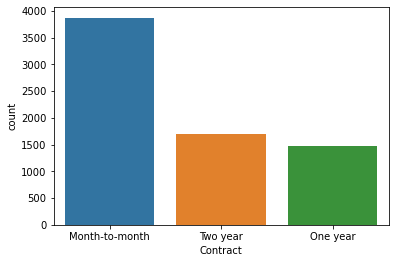

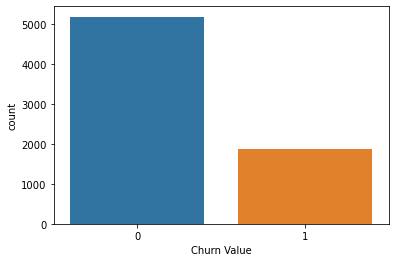

In [9]:
# visualize the distribution of the contract types
sns.countplot(x='Contract', data=dataset)

plt.show()

# visualize the distribution of the churn values
sns.countplot(x='Churn Value', data=dataset)

plt.show()

         Contract  Churn Value  percentage
0  Month-to-month            0   57.290323
1  Month-to-month            1   42.709677
2        One year            0   88.730482
3        One year            1   11.269518
4        Two year            0   97.168142
5        Two year            1    2.831858


<AxesSubplot:xlabel='Contract', ylabel='percentage'>

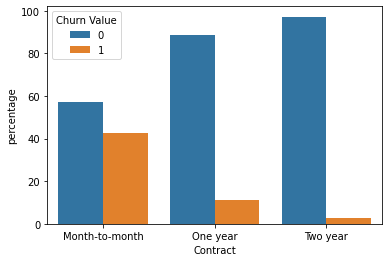

In [10]:
# calculate the proportion of churn value for each contract type
contract_churn = dataset.groupby(['Contract'])['Churn Value'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

# print the proportion of churn value for each contract type
print(contract_churn)

# plot the proportion of churn value for each contract type
sns.barplot(x="Contract", y="percentage", hue="Churn Value", data=contract_churn)



<AxesSubplot:xlabel='Contract', ylabel='count'>

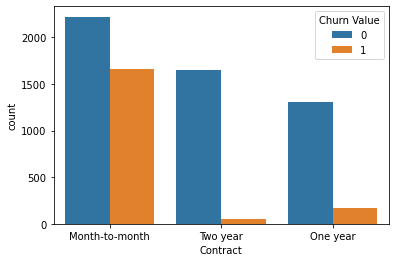

In [11]:
# visualizing the distribution of all contract types vs churn value
sns.countplot(x='Contract', hue='Churn Value', data=dataset)

In [12]:
# separate each category of contract type with its churn value
month_to_month = dataset[dataset['Contract'] == 'Month-to-month']
one_year = dataset[dataset['Contract'] == 'One year']
two_year = dataset[dataset['Contract'] == 'Two year']

# calculate the proportion of churn value for each contract type
month_to_month_churn = month_to_month.groupby(['Contract'])['Churn Value'].value_counts(
    normalize=True).rename('percentage').mul(100).reset_index()
one_year_churn = one_year.groupby(['Contract'])['Churn Value'].value_counts(
    normalize=True).rename('percentage').mul(100).reset_index()
two_year_churn = two_year.groupby(['Contract'])['Churn Value'].value_counts(
    normalize=True).rename('percentage').mul(100).reset_index()

# print the proportion of churn value for each contract type
print(month_to_month_churn)
print(one_year_churn)
print(two_year_churn)

         Contract  Churn Value  percentage
0  Month-to-month            0   57.290323
1  Month-to-month            1   42.709677
   Contract  Churn Value  percentage
0  One year            0   88.730482
1  One year            1   11.269518
   Contract  Churn Value  percentage
0  Two year            0   97.168142
1  Two year            1    2.831858


##### Initial observations:
It is clear that customers with contract type month-to-month have higher churn proportion compared to other contract types. However, we need to perform statistical analysis to determine if this difference is significant.

#### Model building:

##### We will answer the question on two similar steps:

1. first infer that the proportion of churned customers for the contract type Month-to-Month is significantly higher `(more than 10%)` than that of customers with contract type One year.

2. second infer that the proportion of churned customers for the contract type Month-to-Month is significantly higher `(more than 10%)` than that of customers with contract type Two year.

3. either conclude that the churn rate of customers with Month-to-Month contracts is significantly higher than that of customers with other contract types or not.

##### Defining the Hypothesises for step 1:
**1. Customers with contracts of type Month-to-Month more likely to churn than those with contract type One year**
u1: proportion of churned customers with contract type Month-to-Month
u2: proportion of churned customers with contract type One year

**2. Null Hypothesis H0: the u1-u2 <= 10%**

**3. Alternative Hypothesis H1: the u1-u2 > 10%**

our significance level is 0.05

In [13]:
# calc mean of month-to-month churn value and one year churn value
month_to_month_mean = month_to_month['Churn Value'].mean()
one_year_mean = one_year['Churn Value'].mean()

# desired difference between the means
diff = 0.1

# calculate the variance of month-to-month churn value and one year churn value
month_to_month_var = month_to_month['Churn Value'].var()
one_year_var = one_year['Churn Value'].var()

# calculate the sample size
n_month_to_month = len(month_to_month)
n_one_year = len(one_year)

# calculate the t statistic
t_statistic = (month_to_month_mean - one_year_mean - diff) / np.sqrt((month_to_month_var / n_month_to_month) + (one_year_var / n_one_year))

# degrees of freedom
df = (month_to_month_var / n_month_to_month + one_year_var / n_one_year) ** 2 / (
            ((month_to_month_var / n_month_to_month) ** 2 / (n_month_to_month - 1)) + ((
                one_year_var / n_one_year) ** 2 / (n_one_year - 1)))

# calculate the critical value
cv = t.ppf(1.0 - 0.05, df)

# compare t statistic with critical value
if t_statistic < cv:
    print('Retain null hypothesis.')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


### we managed to reject the null hypothesis and conclude that the churn rate of customers with Month-to-Month contracts is significantly higher `()` than that of customers with One year contracts.

##### Defining the Hypothesises for step 2:
**1. Customers with contracts of type Month-to-Month more likely to churn than those with contract type Two year**
u1: proportion of churned customers with contract type Month-to-Month
u2: proportion of churned customers with contract type Two year

**2. Null Hypothesis H0: the u1-u2 <= 10%**

**3. Alternative Hypothesis H1: the u1-u2 > 10%**

our significance level is 0.05

In [14]:
# calc mean of month-to-month churn value and two year churn value
two_year_mean = two_year['Churn Value'].mean()

# calculate the variance of two year churn value
two_year_var = two_year['Churn Value'].var()

# calculate the sample size
n_two_year = len(two_year)

# calculate the t statistic
t_statistic = (month_to_month_mean - two_year_mean - diff) / np.sqrt((month_to_month_var / n_month_to_month) + (two_year_var / n_two_year))

# degrees of freedom
df = (month_to_month_var / n_month_to_month + two_year_var / n_two_year) ** 2 / (
            ((month_to_month_var / n_month_to_month) ** 2 / (n_month_to_month - 1)) + 
            ((two_year_var / n_two_year) ** 2 / (n_two_year - 1)) )

# calculate the critical value
cv = t.ppf(1.0 - 0.05, df)

# compare t statistic with critical value
if t_statistic < cv:
    print('Retain null hypothesis.')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


### we managed to reject the null hypothesis and conclude that the churn rate of customers with Month-to-Month contracts is significantly higher `()` than that of customers with Two year contracts.